In [ ]:
!pip install opencv-python==4.5.5.64

In [ ]:
!python --version

Python 3.7.13


In [ ]:
!apt install subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
!svn checkout https://github.com/ishitharaj/phlebologyprojectHSE/trunk/data/

Checked out revision 8.


In [ ]:
from glob import glob
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import math
from skimage.io import imread
import cv2 as cv2
from tqdm import tqdm

In [ ]:
data_filtered = "/content/data/CVI-img-datasets/filtered"
classes = ['1', '2', '3']

In [ ]:
class1images = glob(data_filtered+'/'+'1'+'/'+'*')
class2images = glob(data_filtered+'/'+'2'+'/'+'*')
class3images = glob(data_filtered+'/'+'3'+'/'+'*')

In [ ]:
#train val test split

class_1 = os.listdir(data_filtered+'/1')
class_2 = os.listdir(data_filtered+'/2')
class_3 = os.listdir(data_filtered+'/3')

for i in range(1,4):
    for t in ["train", "test"]:
        !mkdir -p /content/data/CVI-img-datasets/filtered/{t}/{i}/

base_path = data_filtered
for i in range(0, len(class_1)):
  filename = class_1[i]
  if i <= 45:
    shutil.copy(f"{base_path}/1/{filename}", f"{base_path}/train/1/{filename}")
  else:
    shutil.copy(f"{base_path}/1/{filename}", f"{base_path}/test/1/{filename}")

for i in range(0, len(class_2)):
  filename = class_2[i]
  if i <= 43:
    shutil.copy(f"{base_path}/2/{filename}", f"{base_path}/train/2/{filename}")
  else:
    shutil.copy(f"{base_path}/2/{filename}", f"{base_path}/test/2/{filename}")

for i in range(0, len(class_3)):
  filename = class_3[i]
  if i <= 91:
    shutil.copy(f"{base_path}/3/{filename}", f"{base_path}/train/3/{filename}")
  else:
    shutil.copy(f"{base_path}/3/{filename}", f"{base_path}/test/3/{filename}")



In [ ]:
len(class1images), len(class2images), len(class3images)

(59, 57, 105)

In [ ]:
#load image paths
def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(imread(path))
    return tmp

In [ ]:
#plot images
def plot_any(arr, title = ''):
    plt.figure(figsize = (15, 25))
    for i in range(len(arr)):
        plt.subplot(1,len(arr),i + 1)
        plt.title(title)
        plt.imshow(arr[i]);

In [ ]:
load_class1images = load_images(class1images[:5])
load_class2images = load_images(class2images[:5])
load_class3images = load_images(class3images[:5])

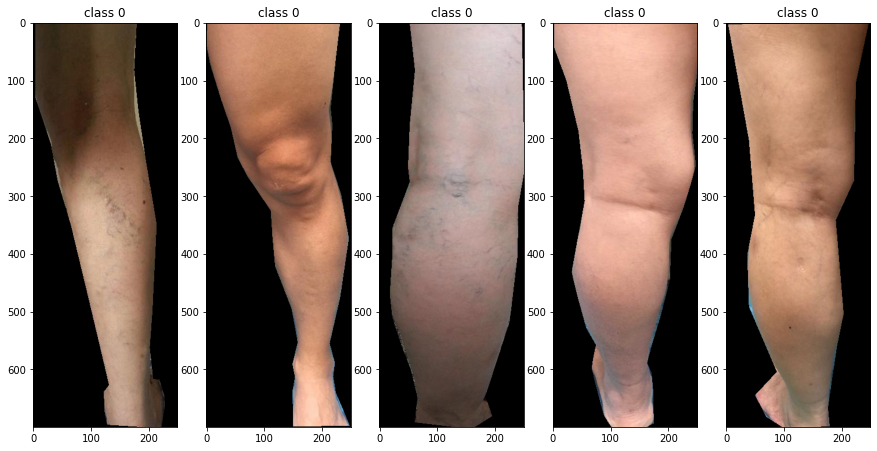

In [ ]:
plot_any(load_class1images, 'class 0')

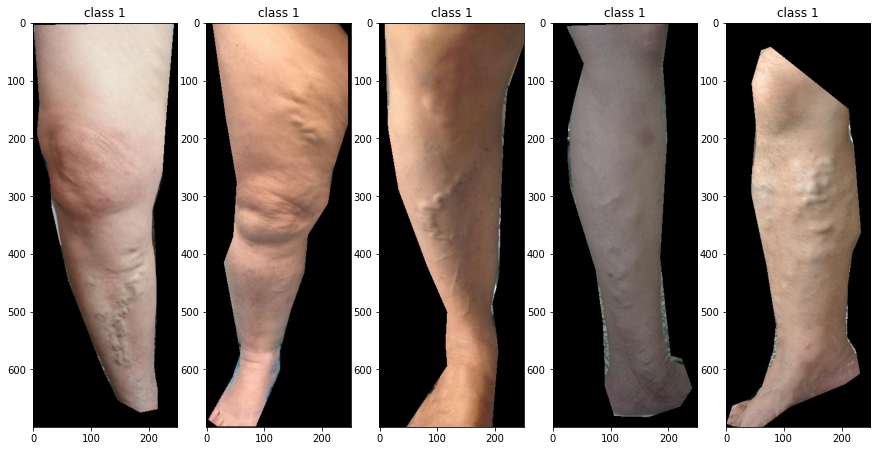

In [ ]:
plot_any(load_class2images, 'class 1')

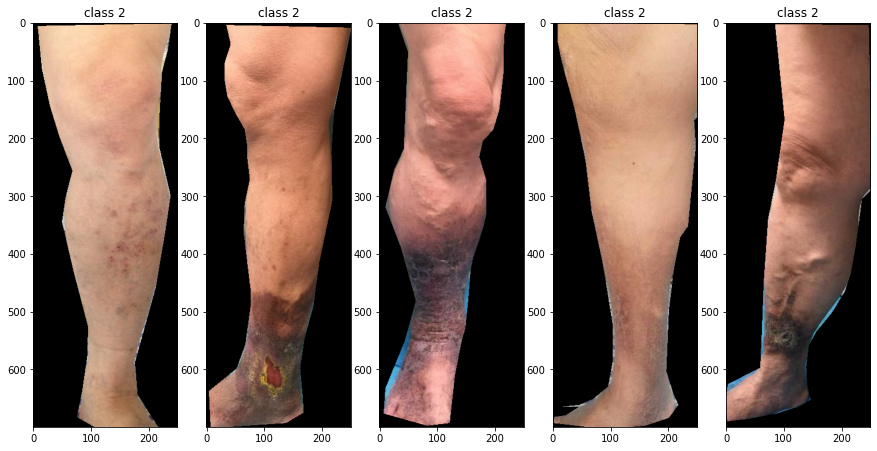

In [ ]:
plot_any(load_class3images, 'class 2')

In [ ]:
import os 
import pandas as pd 
import scipy
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

import tensorflow as tf
from tensorflow.keras.models import Model

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 
from matplotlib.pyplot import imread
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
def generate_csv(path):
    print("CSV being generated")
    uniques = ["1" , "2" , "3" ]
    dirs = ["train" , "test"]

    data = []
    for dir in dirs :
        for unique in uniques:
            directory = path + "/" + dir + "/" + unique    #required path 

            for filename in os.listdir(directory):
               
                paths = directory + "/" + filename  #required path 
                data.append([ filename , paths  , unique])

    df = pd.DataFrame(data, columns = ["filename" ,"path", "class"]) 
    df = shuffle(df)
    if os.path.exists(path + "/csv/") is False:
      !mkdir -p "/content/data/CVI-img-datasets/filtered/csv/"
    
    name = path + "/csv/" + "Data-full"        #required path 
    df.to_csv(name, index = False)
    print("Generation Complete")
    return df

In [ ]:
path = "/content/data/CVI-img-datasets/filtered"

In [ ]:
df = generate_csv(path)

CSV being generated
Generation Complete


In [ ]:
df

,filename,path,class
82,moderate_52.jpg,/content/data/CVI-img-datasets/filtered/train/...,2
121,severe_95.jpg,/content/data/CVI-img-datasets/filtered/train/...,3
44,gentle_18.jpg,/content/data/CVI-img-datasets/filtered/train/...,1
118,severe_52.jpg,/content/data/CVI-img-datasets/filtered/train/...,3
83,moderate_9.jpg,/content/data/CVI-img-datasets/filtered/train/...,2
...,...,...,...
35,gentle_45.jpg,/content/data/CVI-img-datasets/filtered/train/...,1
128,severe_55.jpg,/content/data/CVI-img-datasets/filtered/train/...,3
86,moderate_42.jpg,/content/data/CVI-img-datasets/filtered/train/...,2
7,gentle_30.jpg,/content/data/CVI-img-datasets/filtered/train/...,1


In [ ]:
y = np.array(list(df["class"]))
x = np.array(list( df["path"]))

In [ ]:
files_for_train_x = []
files_for_validation_x = []
files_for_train_y = []
files_for_validation_y = []

In [ ]:
def create_model(model_name,IMG_SIZE = 256, output = 3):


    IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)  # IMG_SIZE = 256
    if(model_name == "EfficientNetV2M" ):

        model = tf.keras.applications.efficientnet_v2.EfficientNetV2M(input_shape=IMG_SHAPE,
                                                            include_top=False,
                                                            weights='imagenet')
    elif(model_name == "InceptionV3"):
        model = tf.keras.applications.inception_v3.InceptionV3(input_shape=IMG_SHAPE,
                                                                        include_top=False,
                                                                        weights='imagenet')
        
    elif(model_name == "InceptionResNetV2"):
        model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=IMG_SHAPE,
                                                                                        include_top=False,
                                                                                        weights='imagenet')
    else:
        return        

    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(model.output)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(100, activation='relu')(x)
    x = tf.keras.layers.Dense(output, activation='softmax')(x)

    model = Model(inputs=model.input, outputs=x)

    my_model = tf.keras.models.clone_model(model)
    return my_model

In [ ]:
def fuzzy_dist(classifier1, classifier2, classifier3, verbose=False):
    out = np.empty(len(classifier1))
    for i in range(len(classifier1)):
        if np.argmax(classifier1[i]) == np.argmax(classifier2[i]) == np.argmax(classifier3[i]):
            out[i] = np.argmax(classifier2[i])
        else:
            measure = np.zeros(len(classifier1[i]))
            for j in range(len(classifier1[i])):
                scores = np.array(
                    [classifier1[i, j], classifier2[i, j], classifier3[i, j]])
                measure[j] = scipy.spatial.distance.cosine(np.ones(3), scores)*scipy.spatial.distance.euclidean(
                    np.ones(3), scores)*scipy.spatial.distance.cityblock(np.ones(3), scores)
                if verbose:
                    print(measure)
            out[i] = np.argmin(measure)
    return out

In [ ]:
def k_fold_splits(x , y , files_for_train_x , files_for_validation_x , files_for_train_y , files_for_validation_y , n_splits = 5):
  kf = KFold(n_splits = n_splits)
  #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
  #fold_no = 1
  for train_index, val_index in kf.split(x):
    
      #it will split the entire data into 3 folds 
      x_train, x_val = x[train_index], x[val_index]
      y_train, y_val = y[train_index], y[val_index]
     

      # split the into 3 folds 

      files_for_train_x.append(x_train)
      files_for_validation_x.append(x_val)
      files_for_train_y.append(y_train)
      files_for_validation_y.append(y_val)
      #fold_no += 1 

In [ ]:
#this function will encode the labels 
#for 3 classes 
def encode_y(y):
  Y = []
  for i in y : 
    if(i == "1" ):
      Y.append(0)
    elif(i == "2" ):
      Y.append(1)
    if(i == "3" ):
      Y.append(2)
      
  return  np.array(Y).astype("float32") 

In [ ]:
# resize and convert file paths info nums 
#then normalize 
width = 256
height = 256
def process_x(x):
  dim = (width, height)
  #cv2.resize(cv2.imread(), dim, interpolation = cv2.INTER_AREA)
  return np.array([cv2.resize(cv2.imread(i), dim, interpolation = cv2.INTER_AREA) for i in x ]).astype("float32") / 255.0   
  #return np.array([imread(i) for i in x ]).astype("float32") / 255.0   

In [ ]:
def k_fold_separate(x_train , y_train , x_val ,y_val , model_name1,model_name2,model_name3 ,fold_no ,  NUM_EPOCHS = 70 , train_batch=16 , validation_batch = 16, lr=1e-4  ):

    train_datagen = ImageDataGenerator(rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


    val_datagen = ImageDataGenerator()

    x_train , y_train , x_val ,y_val = process_x(x_train) , encode_y(y_train) , process_x(x_val) , encode_y(y_val)  



    train =  train_datagen.flow(x_train, y_train, batch_size=train_batch)
    validation = val_datagen.flow(x_val ,y_val,
                          batch_size=validation_batch)
    test = x_val 
    print('------------------------------------------------------------------------')
    print()
    print("fold no --- " , fold_no)
    print()
    print('------------------------------------------------------------------------')

    y_preds = []
    print()
    print(model_name1)
    print()


    
    model1 = create_model(model_name1)
    
    # Compile the model
    model1.compile(loss='sparse_categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, decay=0.0001),
                  metrics=['accuracy'])


    # Generate a print

    # Fit data to model
    history1 = model1.fit(x = train ,
                         validation_data= validation,
                         epochs=NUM_EPOCHS
                         
                          ) 
    

    # Generate generalization metrics
    scores = model1.evaluate(validation)
    print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
    # predictions = model.predict()
    preds1 = model1.predict(test , batch_size=  validation_batch )
    for pred in preds1 : 
      y_preds.append(np.argmax(pred))
    print('Accuracy Score: ',accuracy_score(y_val,y_preds))
    n = len(precision_score(y_val,y_preds , average= None ))
    print('Precision Score(Class wise): ',precision_score(y_val,y_preds , average= None ), " mean- " , sum(precision_score(y_val,y_preds , average= None ))/n)
    print('Recall Score(Class wise): ',recall_score(y_val,y_preds , average= None ), " mean- " , sum(recall_score(y_val,y_preds , average= None ))/n)
    print('F1 Score(Class wise): ',f1_score(y_val,y_preds , average= None), " mean- " , sum(f1_score(y_val,y_preds , average= None))/n)
    print('Conf Matrix Score(Class wise):\n ',confusion_matrix(y_val,y_preds ))    

    y_preds = []
    print()
    print(model_name2)
    print()

    #------------------------------------------------------------------------------------------------------------------------------------------------------------------
    model2 = create_model(model_name2)
    
    # Compile the model
    model2.compile(loss='sparse_categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, decay=0.0001),
                  metrics=['accuracy'])


    # Generate a print

    # Fit data to model
    history2 = model2.fit(x = train ,
                         validation_data= validation,
                         epochs=NUM_EPOCHS
                           
                        )
    
    # Generate generalization metrics
    scores = model2.evaluate(validation)
    print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
    # predictions = model.predict()
    preds2 = model2.predict(test , batch_size= validation_batch )
    for pred in preds2 : 
      y_preds.append(np.argmax(pred))

    print('Accuracy Score: ',accuracy_score(y_val,y_preds))
    
    print('Precision Score(Class wise): ',precision_score(y_val,y_preds , average= None ), " mean- " , sum(precision_score(y_val,y_preds , average= None ))/n)
    print('Recall Score(Class wise): ',recall_score(y_val,y_preds , average= None ), " mean- " , sum(recall_score(y_val,y_preds , average= None ))/n)
    print('F1 Score(Class wise): ',f1_score(y_val,y_preds , average= None), " mean- " , sum(f1_score(y_val,y_preds , average= None))/n)
    print('Conf Matrix Score(Class wise):\n ',confusion_matrix(y_val,y_preds ))   

    y_preds = [] 
    print()
    print(model_name3)
    print()

    #------------------------------------------------------------------------------------------------------------------------------------------------------------------
    model3 = create_model(model_name3)
    
    # Compile the model
    model3.compile(loss='sparse_categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, decay=0.0001),
                  metrics=['accuracy'])
    
    # Generate a print

    # Fit data to model
    history3 = model3.fit(x = train ,
                         validation_data= validation,
                         epochs=NUM_EPOCHS
                         
                         )
    
     # Generate generalization metrics
    scores = model3.evaluate(validation)
    print(f'Score for fold {fold_no}: {model3.metrics_names[0]} of {scores[0]}; {model3.metrics_names[1]} of {scores[1]*100}%')
    # predictions = model.predict()
    preds3 = model3.predict(test , batch_size=  validation_batch )
    for pred in preds3 : 
      y_preds.append(np.argmax(pred))

    print('Accuracy Score: ',accuracy_score(y_val,y_preds))
    
    print('Precision Score(Class wise): ',precision_score(y_val,y_preds , average= None ), " mean- " , sum(precision_score(y_val,y_preds , average= None ))/n)
    print('Recall Score(Class wise): ',recall_score(y_val,y_preds , average= None ), " mean- " , sum(recall_score(y_val,y_preds , average= None ))/n)
    print('F1 Score(Class wise): ',f1_score(y_val,y_preds , average= None), " mean- " , sum(f1_score(y_val,y_preds , average= None))/n)
    print('Conf Matrix Score(Class wise):\n ',confusion_matrix(y_val,y_preds ))   
    
    ensem_pred=fuzzy_dist(preds1,preds2,preds3)
    print('Post Ensemble Accuracy Score: ',accuracy_score(y_val,ensem_pred))

    print('Post Ensemble Precision Score(Class wise): ',precision_score(y_val,ensem_pred , average= None ) , " mean- " , sum(precision_score(y_val,ensem_pred , average= None ))/n )
    print('Post Ensemble Recall Score(Class wise): ',recall_score(y_val,ensem_pred , average= None ), " mean- " , sum(recall_score(y_val,ensem_pred , average= None ))/n)
    print('Post Ensemble F1 Score(Class wise): ',f1_score(y_val,ensem_pred , average= None), " mean- " , sum(f1_score(y_val,ensem_pred , average= None))/n)
    print('Post Ensemble Conf Matrix Score(Class wise):\n ',confusion_matrix(y_val,ensem_pred ))


In [ ]:
num_epochs = 30
path = "/content/data/CVI-img-datasets/filtered"
batch_size = 8
kfold = 3
lr = 0.0001

In [ ]:
k_fold_splits(x,y, files_for_train_x ,  files_for_validation_x ,
              files_for_train_y , files_for_validation_y,  n_splits = kfold )

In [ ]:
#N is the number of folds
N = len(files_for_train_x)

In [ ]:
N

3

In [ ]:
for i in range(0,N):
    k_fold_separate(files_for_train_x[i] , files_for_train_y[i] ,
                    files_for_validation_x[i] ,files_for_validation_y[i] ,
                    "InceptionV3" , "EfficientNetV2M" ,"InceptionResNetV2" ,i+1 ,
                    NUM_EPOCHS = num_epochs , train_batch=batch_size ,
                    validation_batch = batch_size, lr=lr)

------------------------------------------------------------------------

fold no ---  1

------------------------------------------------------------------------

InceptionV3

Epoch 1/30
19/19 [==============================] - 132s 6s/step - loss: 1.4838 - accuracy: 0.4286 - val_loss: 1.1025 - val_accuracy: 0.2297
Epoch 2/30
19/19 [==============================] - 115s 6s/step - loss: 1.2001 - accuracy: 0.4490 - val_loss: 1.1036 - val_accuracy: 0.2297
Epoch 3/30
19/19 [==============================] - 116s 6s/step - loss: 1.1873 - accuracy: 0.4830 - val_loss: 1.0998 - val_accuracy: 0.2297
Epoch 4/30
19/19 [==============================] - 112s 6s/step - loss: 1.1307 - accuracy: 0.5170 - val_loss: 1.0564 - val_accuracy: 0.4865
Epoch 5/30
19/19 [==============================] - 117s 6s/step - loss: 1.0969 - accuracy: 0.4898 - val_loss: 1.0694 - val_accuracy: 0.4865
Epoch 6/30
19/19 [==============================] - 106s 6s/step - loss: 1.0001 - accuracy: 0.4898 - val_loss: 1.0653 

5